In [2]:
# This code is useful if you want to run this in google colaboratory (comes with all imports, etc.) To do this, copy the folder to Colab Notebooks.

#from google.colab import drive
#drive.mount('/content/gdrive')
#import os
#os.chdir('/content/gdrive/My Drive/Colab Notebooks/digit-recognizer')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# non-ML imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# ML imports
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input

Using TensorFlow backend.


In [0]:
# data from https://www.kaggle.com/c/digit-recognizer/data. 
# Assumes that this ipynb is within the folder extracted from the data download from here.

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
# separating the features and the labels from the train set. 

features = train.to_numpy()[:, 1:]
labels = train.to_numpy()[:,0]

print(features.shape)
print(labels.shape)

(42000, 784)
(42000,)


## Fully-connected Neural Network
This is not the right way to work with image data, so we should expect to see poor results.

In [7]:
# from this, we see that features is in a VECTOR format initially (1-dimensional). 
# we also see that the labels are not one-hot encoded (they are encoded as numbers, which is called 'sparse')
print(features[0])
print(labels[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253
  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247 253
 208  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  29 207 253 235  77   0   

In [8]:
#Let's try ML using the vector formatted labels...
model = Sequential()
model.add(Dense(64, input_dim = 784, activation='relu')) #Add a single hidden layer. Since it's the first layer, specify input_dim (number of features)
model.add(Dense(10, activation='softmax')) #Output layer has softmax so that total probability = 1. Classification model.

# sparse_categorical_crossentropy: the labels aren't one-hot encoded
# metrics: accuracy. More interpretable than crossentropy. 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['acc'])


In [18]:
# As we can see, the accuracy is okay. 
model.fit(features[:-100], labels[:-100], validation_data = (features[-100:], labels[-100:]), epochs = 10)

Train on 41900 samples, validate on 100 samples
Epoch 1/10
41900/41900 [==============================] - 4s 98us/step - loss: 4.3437 - acc: 0.7294 - val_loss: 2.9013 - val_acc: 0.8200
Epoch 2/10
41900/41900 [==============================] - 4s 96us/step - loss: 4.3973 - acc: 0.7262 - val_loss: 3.0624 - val_acc: 0.8100
Epoch 3/10
41900/41900 [==============================] - 4s 95us/step - loss: 4.3403 - acc: 0.7298 - val_loss: 3.7072 - val_acc: 0.7700
Epoch 4/10
15168/41900 [=========>....................] - ETA: 2s - loss: 4.3653 - acc: 0.7280

KeyboardInterrupt: ignored

In [0]:
# We must convert the vector formatted data into image data, which is 2-dimensional. The last dimension 1 
# refers to the color channels; we only have 1 (greyscale image). The 28x28 refers to the x and y of image.
features_img = np.reshape(features, [42000, 28, 28, 1]) # samples, first dimension, second dimension, channels

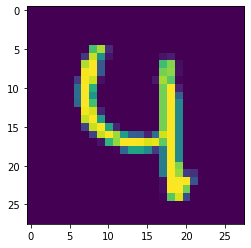

4


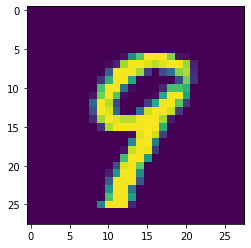

9


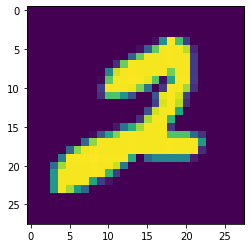

2


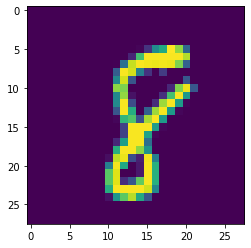

8


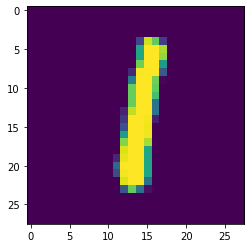

1


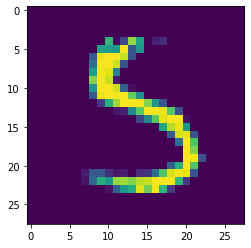

5


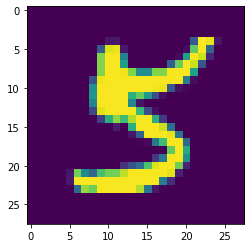

5


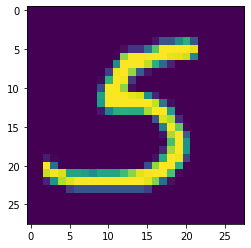

5


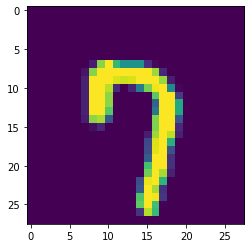

9


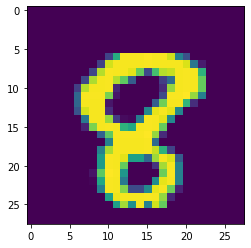

8


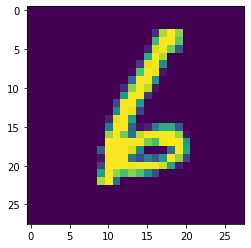

6


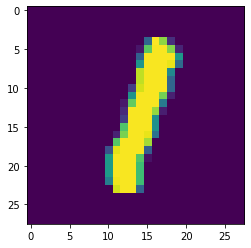

1


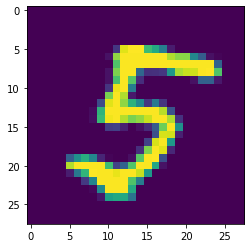

5


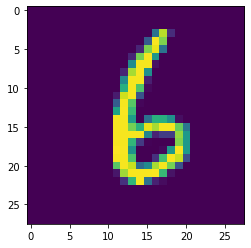

6


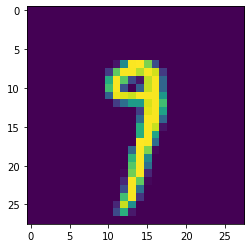

9


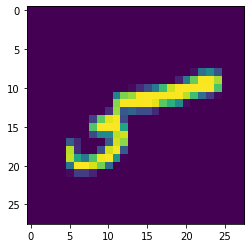

5


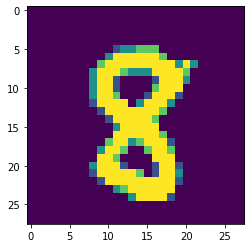

8


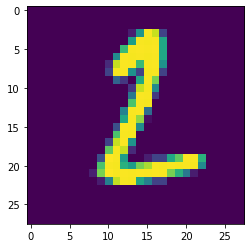

2


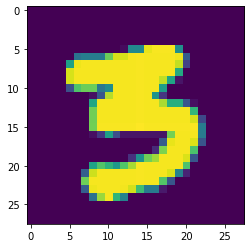

3


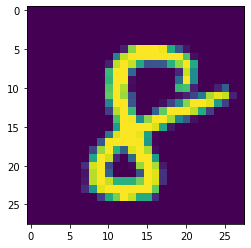

8


In [24]:
# er, it looks really good! only one misclassification in this set,
# it's probably because it's not a very hard problem. 

for i, x in enumerate(features[-100:-80]):
    plt.imshow(np.squeeze(features_img[-100+i]))
    plt.show()
    print(np.argmax(model.predict(np.asarray([x]))))

## Convolutional Neural Network

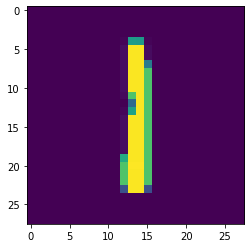

1


In [13]:
# Making sure that this reshape did what I wanted it to do

plt.imshow(np.squeeze(features_img[2])) # Squeeze gets rid of the last channel, just needed to visualize it using this function.
plt.show()
print(labels[2])

In [14]:
# Stopping it early, clearly the accuracy is already very good.
# Normally we can use other layers too, such as max pooling, etc.

model_img = Sequential()
model_img.add(Conv2D(128, 2, activation='relu', input_shape = (28, 28,1))) #convolutional section
model_img.add(Conv2D(64, 2, activation='relu'))
model_img.add(Conv2D(64, 2, activation='relu'))

model_img.add(Flatten()) # fully-connected section
model_img.add(Dense(64, activation='relu'))
model_img.add(Dense(10, activation='softmax'))
model_img.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['acc'])
model_img.fit(features_img[:-100], labels[:-100], validation_data = (features_img[-100:], labels[-100:]), epochs = 10)

Train on 41900 samples, validate on 100 samples
Epoch 1/10
41900/41900 [==============================] - 19s 459us/step - loss: 0.3727 - acc: 0.9382 - val_loss: 0.0536 - val_acc: 0.9700
Epoch 2/10
41900/41900 [==============================] - 14s 339us/step - loss: 0.0628 - acc: 0.9800 - val_loss: 0.0443 - val_acc: 0.9800
Epoch 3/10
16352/41900 [==========>...................] - ETA: 8s - loss: 0.0326 - acc: 0.9900

KeyboardInterrupt: ignored

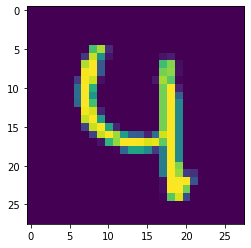

4


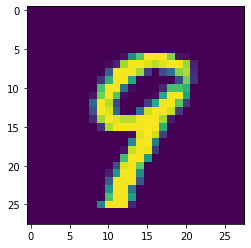

9


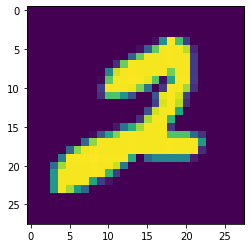

2


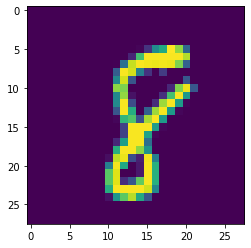

8


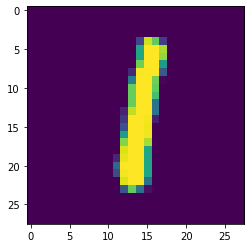

1


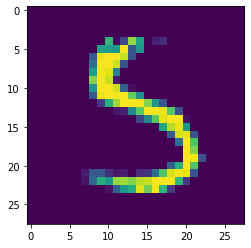

5


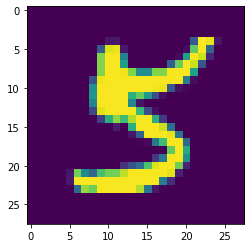

5


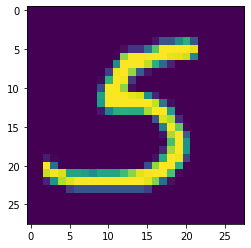

5


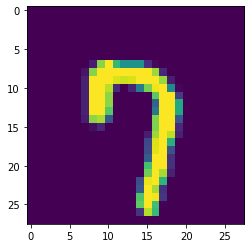

7


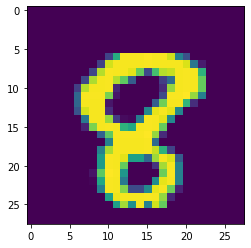

8


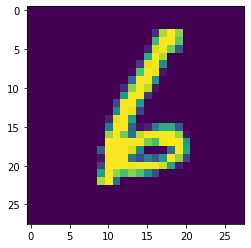

6


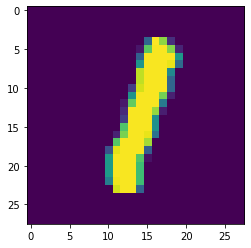

1


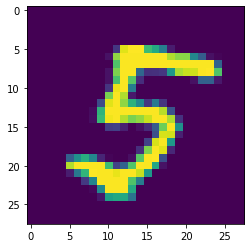

5


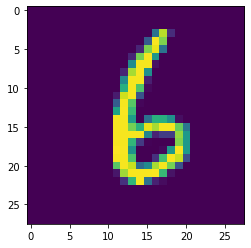

6


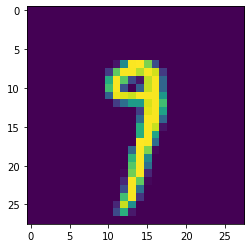

9


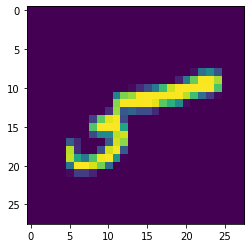

5


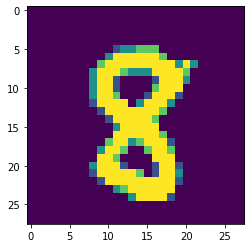

8


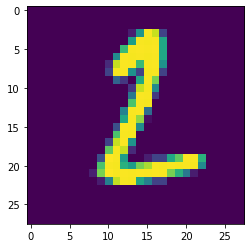

2


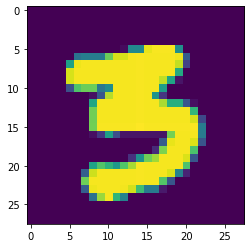

3


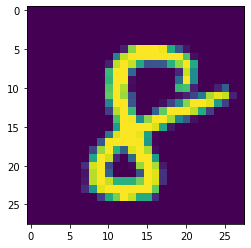

8


In [25]:
# Let's just confirm that the CNN predictions are actually accurate:
for i, x in enumerate(features_img[-100:-80]):
    plt.imshow(np.squeeze(x))
    plt.show()
    print(np.argmax(model_img.predict(np.asarray([x]))))

# Yep, looks good!